**Κώδικας visualization του Banners Tag Localization**

Με τον παρακάτω κώδικα θα κάνουμε visualize τα δεδομένα. Συγκεκριμένα, έχουμε visualization της φάσης σε συνάρτηση με την απόσταση κίνησης r, καθώς και ιστόγραμμα από τη χρονική στιγμή δειγματοληψίας για κάθε tag. Για το ιστόγραμμα πρώτα αφαιρούμε τις ακραίες τιμές. Παρατηρούμε ότι ακολουθεί κανονική κατανομή. Επίσης αποθηκεύουμε τα δεδομένα σε μορφή xl για να είναι πιο εύκολο να τα δει κανείς στο μέλλον. Τέλος, έχουμε γράψει κώδικα για visualization σε 3D και ως προς x και y, αλλά στην πραγματικότητα αυτό δεν μας απασχολεί και δεν δίνει κάποια πρακτική βοήθεια, οπότε το αφήσαμε εκτός.

Προσοχή! Ο κώδικας αποθηκεύει στον υπολογιστή τα αρχεία σε καινούριους φακέλους. Αν οι φάκελοι αυτοί υπάρχουν ήδη, καλό είναι να μην τον ξανατρέξετε και απλά να τους ανοίξετε και να δείτε τα αποτελέσματα επιτόπου. Το σκριπτάκι δίνεται μόνο για λόγους πληρότητας. Δεν χρείαζεται να ξανατρέξει.

Σε περίπτωση που πρέπει να τρέξει, το version της Python είναι 3.11.9 και οι βιβλιοθήκες matplotlib,pandas,numpy πρέπει να έχουν εγκατασταθεί στο σύστημα. Το script πρέπει να τρέξει σε directory που να περιέχει τον φάκελο Experiments.

Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E9884E0A61819FA9.txt
Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E9884F0A61819FAD.txt
Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E988510A61819FB5.txt
Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E988610A61819FF5.txt
Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E988640A6181A001.txt
Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E9886D0A6181A025.txt
Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E9886F0A6181A02D.txt
Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E988710A6181A035.txt
Measurements/Single Banner Horizontal/S path/Antenna_1/unwrapped_measurements/E2003EA4E9887A0A6181A059.txt
Measurements/Single Banner Horizontal

KeyboardInterrupt: 

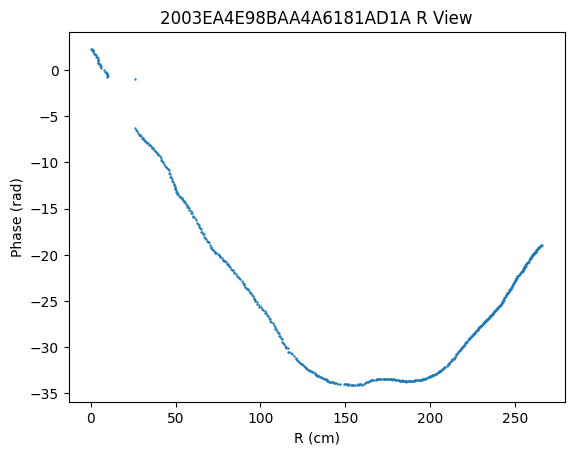

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
import numpy as np


  

def format_files_type_1(files,path_of_txt,output_path_img,output_path_xl):
    for file in files:
        data = pd.read_csv(f"{path_of_txt}/{file}")
        #χρονική στιγμή που πάρθηκε η μετρηση (seconds), νούμερο κεραίας, φάση του σήματος, ισχύς του σήματος, 
        #x' συν/νη της κεραίας εκείνη τη χρονική στιγμή (cm), y' συν/νη της κεραίας (cm), z' συν/νη της κεραίας (cm), προσανατολισμός της κεραίας
        data.columns = ["timestamp (sec)","Antenna","Phase","Power","x(cm)","y(cm)","z(cm)","Antenna orientation"]
        filename = file[1:-4]
        
        Delta_x = data.values[1:,4]-data.values[0:-1,4]
        Delta_y = data.values[1:,5]-data.values[0:-1,5]
        Delta_r = np.sqrt(np.pow(Delta_x,2)+np.pow(Delta_y,2))
        if(len(Delta_r) > 1):
            Q1 = np.percentile(Delta_r, 25)
            Q3 = np.percentile(Delta_r, 75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            Delta_r_filtered = [x for x in Delta_r if lower_bound <= x <= upper_bound]

            
            # fig5 = plt.figure()
            # plt.hist(Delta_r_filtered,bins=6)
            # plt.title(f"{filename} Delta r hist")
            # #plt.savefig(f"{output_path_img}/{filename}_Delay_hist.png")
            # #plt.close()
            # plt.show()

        r = np.cumsum(Delta_r)
        data["r(cm)"] = np.hstack((r,None))

        #save data to xl
        data.to_excel(f"{output_path_xl}/{filename}.xlsx")

        #create and save the figures
        # fig = plt.figure(figsize=(12, 12))
        # ax = fig.add_subplot(projection='3d')

        # ax.scatter(data.values[:,4],data.values[:,5],-data.values[:,2],s=0.5)
        # ax.set_title(f"{filename} 3D View")
        # ax.set_xlabel("X (cm)")
        # ax.set_ylabel("Y (cm)")
        # ax.set_zlabel("phase (rad)")
        # # plt.savefig(f"{output_path_img}/{filename}_3D_view.png")
        # plt.show()

        # fig2 = plt.figure()
        # plt.scatter(data.values[:,4],-data.values[:,2],marker='o',s=0.5)
        # plt.title(f"{filename} X View")
        # plt.xlabel("X (cm)")
        # plt.ylabel("Phase (rad)")
        # # plt.savefig(f"{output_path_img}/{filename}_X_view.png")
        # plt.show()


        # fig3 = plt.figure()
        # plt.scatter(data.values[:,5],-data.values[:,2],marker='o',s=0.5)
        # plt.title(f"{filename} Y View")
        # plt.xlabel("Y (cm)")
        # plt.ylabel("Phase (rad)")
        # # plt.savefig(f"{output_path_img}/{filename}_Y_view.png")
        # plt.show()

        fig4 = plt.figure()
        plt.scatter(r*100,-data.values[:-1,2],marker='o',s=0.5)
        plt.title(f"{filename} R View")
        plt.xlabel("R (cm)")
        plt.ylabel("Phase (rad)")
        plt.savefig(f"{output_path_img}/{filename}_R_view.png")
        plt.close()
        #plt.show()

def format_files_type_2(files,path_of_txt_unwrapped,output_path_img_unwrapped,output_path_xl_unwrapped):
    for file in files:
        print(f"{path_of_txt_unwrapped}/{file}")
        data = pd.read_csv(f"{path_of_txt_unwrapped}/{file}")
        #χρονική στιγμή που πάρθηκε η μετρηση (second), x' συν/νη της κεραίας εκείνη τη χρονική στιγμή (cm) στο χάρτη του ρομπότ,
        #y' συν/νη της κεραίας (cm), z' συν/νη της κεραίας (cm), ισχύς του σήματος, φάση του σήματος, unwrapped φάση
        data.columns = ["timestamp (sec)","x(cm)","y(cm)","z(cm)","P","phase(rad)","unwrapped phase(rad)"]
        filename = file[1:-4]
        
        Delta_x = data.values[1:,1]-data.values[0:-1,1]
        Delta_y = data.values[1:,2]-data.values[0:-1,2]
        Delta_r = np.sqrt(np.pow(Delta_x,2)+np.pow(Delta_y,2))
        if(len(Delta_r) > 1):
            Q1 = np.percentile(Delta_r, 25)
            Q3 = np.percentile(Delta_r, 75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            Delta_r_filtered = [x for x in Delta_r if lower_bound <= x <= upper_bound]

            # fig5 = plt.figure()
            # plt.hist(Delta_r_filtered)
            # plt.title(f"{filename} Delta r hist")
            # plt.savefig(f"{output_path_img_unwrapped}/{filename}_Delay_hist.png")
            # plt.close()

        r = np.cumsum(Delta_r)
        data["r(cm)"] = np.hstack((r,None))
        #print data to excel
        data.to_excel(f"{output_path_xl_unwrapped}/{filename}.xlsx")

        # #make the figures and save them
        # fig = plt.figure(figsize=(12, 12))
        # ax = fig.add_subplot(projection='3d')
        # ax.scatter(data.values[:,1],data.values[:,2],data.values[:,6],s=0.5)
        # ax.set_title(f"{filename} 3D View")
        # ax.set_xlabel("X (cm)")
        # ax.set_ylabel("Y (cm)")
        # ax.set_zlabel("phase (rad)")
        # # plt.savefig(f"{output_path_img_unwrapped}/{filename}_3D_view.png")
        # plt.show()

        # fig2 = plt.figure()
        # plt.scatter(data.values[:,1],data.values[:,6],marker='o',s=0.5)
        # plt.title(f"{filename} X View")
        # plt.xlabel("X (cm)")
        # plt.ylabel("Phase (rad)")
        # # plt.savefig(f"{output_path_img_unwrapped}/{filename}_X_view.png")
        # plt.show()


        # fig3 = plt.figure()
        # plt.scatter(data.values[:,2],data.values[:,6],marker='o',s=0.5)
        # plt.title(f"{filename} Y View")
        # plt.xlabel("Y (cm)")
        # plt.ylabel("Phase (rad)")
        # # plt.savefig(f"{output_path_img_unwrapped}/{filename}_Y_view.png")
        # plt.show()

        fig4 = plt.figure()
        plt.scatter(r,data.values[:-1,6],marker='o',s=0.5)
        plt.title(f"{filename} R View")
        plt.xlabel("R (cm)")
        plt.ylabel("Phase (rad)")
        plt.savefig(f"{output_path_img_unwrapped}/{filename}_R_view.png")
        plt.close()
        plt.show()

def main():
    path_type = ["S_path" "Strainght_path" "V_path"]
    main_files = ["Single Banner Horizontal","Single Banner Vertical","Two Banners Back 2 Back","Two Banners Side by Side"]
    for main_file in main_files:
        path_types = os.listdir(f"Measurements/{main_file}")
        for path_type in path_types:
            antennas = os.listdir(f"Measurements/{main_file}/{path_type}")
            for antenna in antennas:
                if(antenna[0:7] == "Antenna"):    
                    path_of_txt = f"Measurements/{main_file}/{path_type}/{antenna}/measurements"
                    path_of_txt_unwrapped = f"Measurements/{main_file}/{path_type}/{antenna}/unwrapped_measurements"
                    output_path_xl = f"Measurements/{main_file}/{path_type}/{antenna}/measurements_xl"
                    output_path_xl_unwrapped = f"Measurements/{main_file}/{path_type}/{antenna}/measurements_xl_unwrapped"
                    output_path_img_unwrapped = f"Measurements/{main_file}/{path_type}/{antenna}/measurements_img_unwrapped"
                    output_path_img = f"Measurements/{main_file}/{path_type}/{antenna}/measurements_img"

                    #This code removes all the directories created and is meant to clean up the entire process
                    
                    # if os.path.isdir(output_path_img):
                    #     shutil.rmtree(output_path_img)
                    # if os.path.isdir(output_path_img_unwrapped):
                    #     shutil.rmtree(output_path_img_unwrapped)
                    # if os.path.isdir(output_path_xl):
                    #     shutil.rmtree(output_path_xl)
                    # if os.path.isdir(output_path_xl_unwrapped):
                    #     shutil.rmtree(output_path_xl_unwrapped)

                    #we create the directories that store the xl files and the images and render and save them inside.
                    os.makedirs(output_path_img, exist_ok=True)
                    os.makedirs(output_path_img_unwrapped,exist_ok=True)
                    os.makedirs(output_path_xl,exist_ok=True)
                    os.makedirs(output_path_xl_unwrapped,exist_ok=True)
                    if(os.path.exists(path_of_txt)):
                        files = os.listdir(path_of_txt)
                        format_files_type_1(files,path_of_txt,output_path_img,output_path_xl)
                    if(os.path.exists(path_of_txt_unwrapped)):
                        files = os.listdir(path_of_txt_unwrapped)
                        #keep only the files that end with .txt
                        files = [file for file in files if file.endswith(".txt")] 
                        format_files_type_2(files,path_of_txt_unwrapped,output_path_img_unwrapped,output_path_xl_unwrapped)

if __name__  == "__main__":  
    main()

c:\Users\giama\Desktop\ece_auth\semester10\NNs-on-RFID-Localization\Experiments\Measurements
[[ 8.23484732  9.08122759  0.633     ]
 [ 8.23490589  9.08118401  0.633     ]
 [ 8.23496702  9.08113854  0.633     ]
 ...
 [10.93355629  7.16840864  0.633     ]
 [10.93368755  7.1683192   0.633     ]
 [10.93416675  7.16799266  0.633     ]]


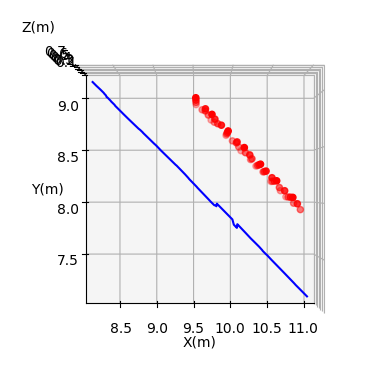

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
import numpy as np


  

def format_files_type_1(files,path_of_txt,output_path_img,output_path_xl):
    for file in files:
        data = pd.read_csv(f"{path_of_txt}/{file}")
        #χρονική στιγμή που πάρθηκε η μετρηση (seconds), νούμερο κεραίας, φάση του σήματος, ισχύς του σήματος, 
        #x' συν/νη της κεραίας εκείνη τη χρονική στιγμή (cm), y' συν/νη της κεραίας (cm), z' συν/νη της κεραίας (cm), προσανατολισμός της κεραίας
        data.columns = ["timestamp (sec)","Antenna","Phase","Power","x(cm)","y(cm)","z(cm)","Antenna orientation"]
        filename = file[1:-4]
        
        Delta_x = data.values[1:,4]-data.values[0:-1,4]
        Delta_y = data.values[1:,5]-data.values[0:-1,5]
        Delta_r = np.sqrt(np.pow(Delta_x,2)+np.pow(Delta_y,2))

        r = np.cumsum(Delta_r)
        data["r(cm)"] = np.hstack((r,None))

        #save data to xl
        data.to_excel(f"{output_path_xl}/{filename}.xlsx")

        fig4 = plt.figure()
        plt.scatter(r*100,-data.values[:-1,2],marker='o',s=0.5)
        plt.title("Wrapped Phase")
        plt.xlabel("R (cm)")
        plt.ylabel("Phase (rad)")
        plt.savefig(f"{output_path_img}/{filename}_R_view.png")
        plt.close()
        #plt.show()

def format_files_type_2(files,path_of_txt_unwrapped,output_path_img_unwrapped,output_path_xl_unwrapped):
    for file in files:
        print(f"{path_of_txt_unwrapped}/{file}")
        data = pd.read_csv(f"{path_of_txt_unwrapped}/{file}")
        #χρονική στιγμή που πάρθηκε η μετρηση (second), x' συν/νη της κεραίας εκείνη τη χρονική στιγμή (cm) στο χάρτη του ρομπότ,
        #y' συν/νη της κεραίας (cm), z' συν/νη της κεραίας (cm), ισχύς του σήματος, φάση του σήματος, unwrapped φάση
        data.columns = ["timestamp (sec)","x(cm)","y(cm)","z(cm)","P","phase(rad)","unwrapped phase(rad)"]
        filename = file[1:-4]
        
        Delta_x = data.values[1:,1]-data.values[0:-1,1]
        Delta_y = data.values[1:,2]-data.values[0:-1,2]
        Delta_r = np.sqrt(np.pow(Delta_x,2)+np.pow(Delta_y,2))

        r = np.cumsum(Delta_r)
        data["r(cm)"] = np.hstack((r,None))
        #print data to excel
        data.to_excel(f"{output_path_xl_unwrapped}/{filename}.xlsx")


        fig4 = plt.figure()
        plt.scatter(r,data.values[:-1,6],marker='o',s=0.5)
        plt.title("Unwrapped Phase")
        plt.xlabel("R (cm)")
        plt.ylabel("Phase (rad)")
        plt.savefig(f"{output_path_img_unwrapped}/{filename}_R_view.png")
        plt.close()
        plt.show()

def main():
    path_type = ["S_path" "Strainght_path" "V_path"]
    main_files = ["Single Banner Horizontal","Single Banner Vertical","Two Banners Back 2 Back","Two Banners Side by Side"]
    for main_file in main_files:
        path_types = os.listdir(f"Measurements/{main_file}")
        for path_type in path_types:
            antennas = os.listdir(f"Measurements/{main_file}/{path_type}")
            for antenna in antennas:
                if(antenna[0:7] == "Antenna"):    
                    path_of_txt = f"Measurements/{main_file}/{path_type}/{antenna}/measurements"
                    path_of_txt_unwrapped = f"Measurements/{main_file}/{path_type}/{antenna}/unwrapped_measurements"
                    output_path_xl = f"Measurements/{main_file}/{path_type}/{antenna}/measurements_xl"
                    output_path_xl_unwrapped = f"Measurements/{main_file}/{path_type}/{antenna}/measurements_xl_unwrapped"
                    output_path_img_unwrapped = f"Measurements/{main_file}/{path_type}/{antenna}/measurements_img_unwrapped"
                    output_path_img = f"Measurements/{main_file}/{path_type}/{antenna}/measurements_img"

                    #This code removes all the directories created and is meant to clean up the entire process
                    
                    if os.path.isdir(output_path_img):
                        shutil.rmtree(output_path_img)
                    if os.path.isdir(output_path_img_unwrapped):
                        shutil.rmtree(output_path_img_unwrapped)
                    if os.path.isdir(output_path_xl):
                        shutil.rmtree(output_path_xl)
                    if os.path.isdir(output_path_xl_unwrapped):
                        shutil.rmtree(output_path_xl_unwrapped)

                    #we create the directories that store the xl files and the images and render and save them inside.
                    # os.makedirs(output_path_img, exist_ok=True)
                    # os.makedirs(output_path_img_unwrapped,exist_ok=True)
                    # os.makedirs(output_path_xl,exist_ok=True)
                    # os.makedirs(output_path_xl_unwrapped,exist_ok=True)
                    # if(os.path.exists(path_of_txt)):
                    #     files = os.listdir(path_of_txt)
                    #     format_files_type_1(files,path_of_txt,output_path_img,output_path_xl)
                    # if(os.path.exists(path_of_txt_unwrapped)):
                    #     files = os.listdir(path_of_txt_unwrapped)
                    #     #keep only the files that end with .txt
                    #     files = [file for file in files if file.endswith(".txt")] 
                    #     format_files_type_2(files,path_of_txt_unwrapped,output_path_img_unwrapped,output_path_xl_unwrapped)

if __name__  == "__main__":  
    main()

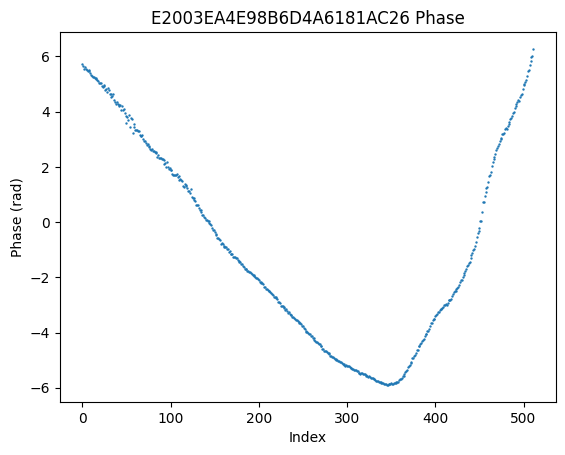

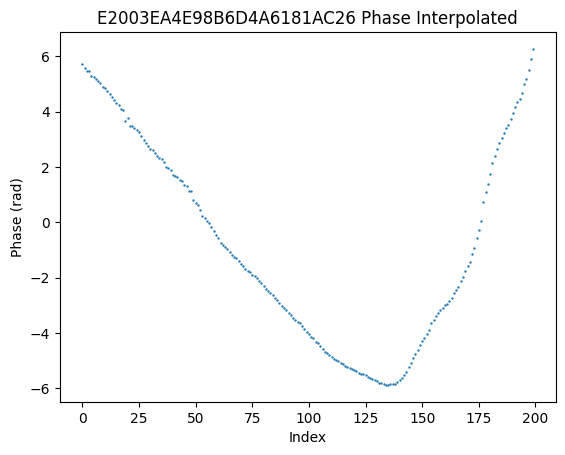

[194.50851982  12.48229196  63.3         11.59510393]


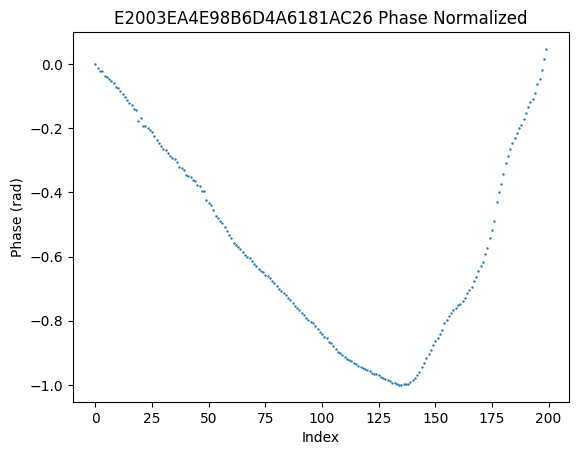

In [ ]:
from pathlib import Path
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


def lin_interpolation(data, length):
    x_original = np.linspace(0, 1, len(data))
    x_new = np.linspace(0, 1, length)    

    # Initialize the result array
    result = np.empty((length, data.shape[1]))

    # Interpolate each column
    for i in range(data.shape[1]):
        interp_func = np.interp(x_new, x_original, data[:, i])
        result[:, i] = interp_func

    return result

# Root folder where all the files are stored
root_folder = Path(__file__).parent if "__file__" in globals() else Path.cwd()
root_folder /= 'Measurements'

experinent = 'Straight ' # Some are named Straight Path, some Straight path.....................................

size_threshold = 10240  #10KB in our case, anything smaller in size will get filtered out

interp_length = 200 # Large enough to not clip information from bigger files, and small enought to not destroy small files, need to check what works best

final_tensor_3d = []
final_labels = []

# Loop through all directories and files
for folder_path, _, files in os.walk(root_folder):
    # We only examine the folders with a specific experiment, in our case Straight Path
    if experinent not in folder_path:
        continue

    if 'Antenna_' not in folder_path: # It means we are on the top-most subfolder, we don't want to read the nested 'Transformed_Coordinates' since the outer one is edited.
        file_tag = os.path.join(folder_path, 'Transformed_Coordinates.xlsx')

        # Check if the file exists
        try:
            rfid_df = pd.read_excel(file_tag)
        except FileNotFoundError:
            continue
        
        # All of the folders we expect to iterate through
        folders = ['Antenna_1', 'Antenna_2', 'Antenna_3', 'Antenna_4']

        # All of the columns we need to save
        sel_cols = ['X_new', 'Y_new', 'Z', 'Phase_Unwrapped']

        # Extract each tag name from the rfid_df
        for tag in rfid_df['EPC_TAG'].unique():
            # Get the rfid tag coordinates
            row = rfid_df[rfid_df["EPC_TAG"] == tag]
            rfid_x = row["X_new"].values[0].item()
            rfid_y = row["Y_new"].values[0].item()
            rfid_z = row['Z'].values[0].item() * 100 # Z was in meters

            # Iterate through all antenna folders, if they exist, and locate the excel file path for each tag
            antenna_data_for_curr_tag = []
            antenna_num = 0
            for folder in folders:
                # Go inside the unwrapped measurements folder to search for the processed excel file
                antenna_folder = os.path.join(folder_path, folder)
                unwrapped_measurement_fold = os.path.join(antenna_folder, 'unwrapped_measurements')

                if os.path.exists(unwrapped_measurement_fold): # If it exists continue
                    antenna_num = antenna_num + 1
                    #print(f"folder {unwrapped_measurement_fold} exists")
                    for file in os.listdir(unwrapped_measurement_fold): # For all files in the unwrapped measurements directory search for the one excel file that has our current tag name
                        if file == f"{tag}_processed.xlsx" or file == f"{tag}_processed_smaller.xlsx":
                            # Create the file path for current tag
                            file_path = os.path.join(unwrapped_measurement_fold, file)

                            # If the file is smaller than a threshold do not save it since it is trash
                            if os.path.getsize(file_path) >= size_threshold:
                                tag_df = pd.read_excel(file_path)

                                # Create the tensor containing all our information [X,Y,Z,phase]
                                info_tens = tag_df[sel_cols].to_numpy()

                                #plot the phase
                                y = np.arange(len(info_tens[:,3]))
                                plt.scatter(y,info_tens[:,3], marker='o', s=0.5)
                                plt.title(f"{tag} Phase")
                                plt.xlabel("Index")
                                plt.ylabel("Phase (rad)")
                                plt.show()
                                # Interpolate to create a specific length tensor not an arbitary one
                                res = lin_interpolation(info_tens, interp_length)

                                y= np.arange(len(res[:,3]))
                                plt.scatter(y,res[:,3], marker='o', s=0.5)
                                plt.title(f"{tag} Phase Interpolated")
                                plt.xlabel("Index")
                                plt.ylabel("Phase (rad)")
                                plt.show()

                                res[:,3] = res[:,3] - res[0,3] 

                                abs_max = np.abs(res).max(axis=(0))  # max per feature over (samples, time)
                                print(abs_max)
                                # Prevent division by zero
                                abs_max[abs_max == 0] = 1.0

                                # Normalize per feature
                                res_norm = res / abs_max  

                                plt.scatter(y,res_norm[:,3], marker='o', s=0.5)
                                plt.title(f"{tag} Phase Normalized")
                                plt.xlabel("Index")
                                plt.ylabel("Phase (rad)")
                                plt.show()

                                #stop the script here to check the plots
                                input("Press Enter to continue...")

parent_dir = Path(__file__).parent if "__file__" in globals() else Path.cwd()
